In [ ]:
!pip install --upgrade typing-extensions ydata_profiling

In [ ]:
!pip install ydata_profiling

En primera instancia; procedemos a importar las librerías que procedemos a usar en el presente apartado:

In [ ]:
from ydata_profiling import ProfileReport

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pyplot as plt

from google.colab import drive
import os

Apuntamos el puntero de directorio en la ruta correspondiente:

In [ ]:
drive.mount('/content/drive')

# Cambia el directorio actual al de la carpeta en Google Drive
os.chdir("/content/drive/MyDrive/EAM/Especializacion_Analitica_de_Datos/Proyecto_de_Grado/Datasets_v2/Datasets_Finales")

# Lista el contenido de la carpeta
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset_Fallas_Clima_Procesado.csv


Se procede a cargar la data construida en el Notebook de ETL en el dataset: "Dataset_Fallas_Clima":

In [ ]:
Dataset_Fallas_Clima = pd.read_csv('Dataset_Fallas_Clima_Procesado.csv')
Dataset_Fallas_Clima

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
0,2021-03-28 21:00:00,U,15.2,0.0,1.450000,1
1,2022-02-04 08:00:00,U,16.2,0.0,1.066667,1
2,2022-03-31 21:00:00,U,15.3,0.2,0.583333,1
3,2022-07-17 09:00:00,U,17.0,0.0,0.916667,1
4,2022-08-05 14:00:00,U,20.3,0.0,0.800000,1
...,...,...,...,...,...,...
1517,2021-02-28 06:00:00,R,14.3,0.0,0.850000,0
1518,2021-11-06 01:00:00,R,13.2,0.0,1.366667,0
1519,2021-03-21 11:00:00,R,21.5,0.0,2.016667,0
1520,2023-03-12 20:00:00,R,15.2,0.0,0.583333,0


Relizamos comprobación de nuestro dataset cargado, verificando inconsistencia en 2 campos marcados en tipo "Objetc":

In [ ]:
Dataset_Fallas_Clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha                      1522 non-null   object 
 1   Zona                       1522 non-null   object 
 2   Temperatura_Promedio       1522 non-null   float64
 3   Precipitacion_Acumulada    1522 non-null   float64
 4   Velocidad_Viento_Promedio  1522 non-null   float64
 5   Falla                      1522 non-null   int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 71.5+ KB


Prodemos a realizar ajuste de tipo correspondinete sobre los datos marcados en el ítem anterior de tipo "Objetc". Finalmente nos quedamos con:

- Fecha -> de tipo: datetime
- Zona -> de tipo: category

In [ ]:
Dataset_Fallas_Clima['Fecha'] = pd.to_datetime(Dataset_Fallas_Clima['Fecha']) # Convertir la columna en objetos datetime
Dataset_Fallas_Clima["Zona"]=Dataset_Fallas_Clima["Zona"].astype("category")

Dataset_Fallas_Clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Fecha                      1522 non-null   datetime64[ns]
 1   Zona                       1522 non-null   category      
 2   Temperatura_Promedio       1522 non-null   float64       
 3   Precipitacion_Acumulada    1522 non-null   float64       
 4   Velocidad_Viento_Promedio  1522 non-null   float64       
 5   Falla                      1522 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 61.2 KB


## **Selección de Variables**

Se realiza el proceso de selección de variables el cual tiene como objetivo identificar y elegir las variables más relevantes y significativas para un análisis o modelo de datos y abonarle a la calidad y la eficacia de los resultados finales.

Para el caso de estudio inicialmente se considera la variable "Fecha", sin embargo, esta última no será eliminada por el momento porque será útil para realizar algunas visualizaciones más adelante.

In [ ]:
Dataset_Fallas_Clima

,Fecha,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
0,2021-03-28 21:00:00,U,15.2,0.0,1.450000,1
1,2022-02-04 08:00:00,U,16.2,0.0,1.066667,1
2,2022-03-31 21:00:00,U,15.3,0.2,0.583333,1
3,2022-07-17 09:00:00,U,17.0,0.0,0.916667,1
4,2022-08-05 14:00:00,U,20.3,0.0,0.800000,1
...,...,...,...,...,...,...
1517,2021-02-28 06:00:00,R,14.3,0.0,0.850000,0
1518,2021-11-06 01:00:00,R,13.2,0.0,1.366667,0
1519,2021-03-21 11:00:00,R,21.5,0.0,2.016667,0
1520,2023-03-12 20:00:00,R,15.2,0.0,0.583333,0


## **Descripción Estadistica**

Procedemos a realizar una descripción estadistica básica de nuestro nuevo dataset, inicialmente se procede a realizar una revisión estadística a través de una diagrama de barras vertical por el campo: "Zona"

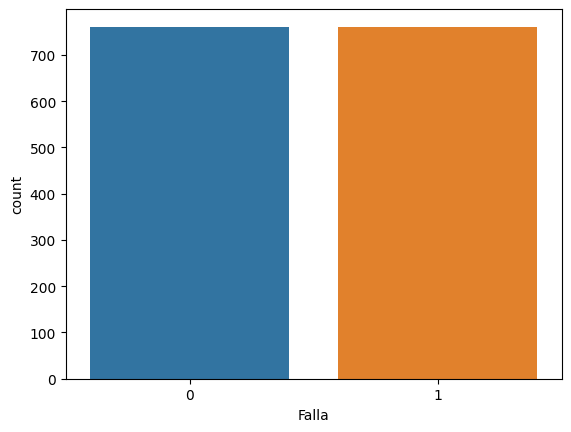

In [ ]:
sns.countplot(x='Falla', data=Dataset_Fallas_Clima)
plt.show()

En el anterior gráfico se puede observar que para los tipo de Falla (Variable Objetivo) (1 - Falla y 2 - No Falla) se tiene igual cantidad de datos según balanceo realizado en el notebook de ETL.

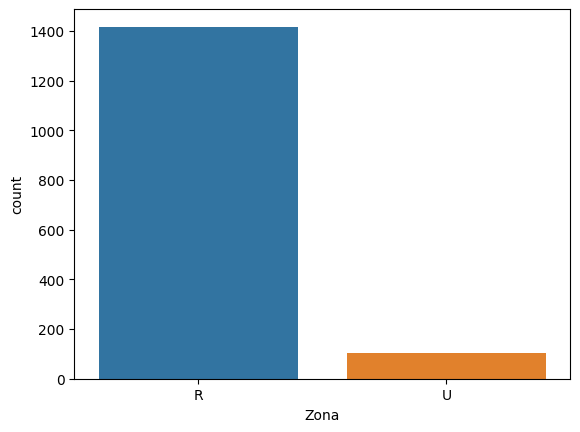

In [ ]:
sns.countplot(x='Zona', data=Dataset_Fallas_Clima)
plt.show()

En el anterior gráfico se puede observar que para los tipo de Zona (Urbano y Rural) se tiene mayor  cantidad de datos en Rural (Que es lo normal en las fallas del sector electrico).

## **Limpieza de atípicos**

En primera instanacia procedemos a graficar para identificar valores atípicos para las variables:

* Duracion_Falla_Horas.
* Temperatura_promedio.
* Precipitacion_acumulada.
* Velocidad_viento_promedio.

<Axes: >

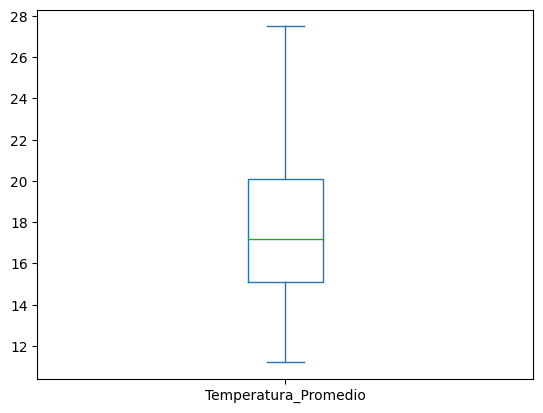

In [ ]:
Dataset_Fallas_Clima['Temperatura_Promedio'].plot.box()

<Axes: >

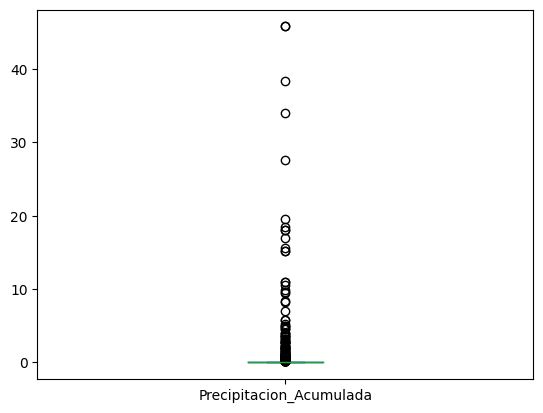

In [ ]:
Dataset_Fallas_Clima['Precipitacion_Acumulada'].plot.box()

<Axes: >

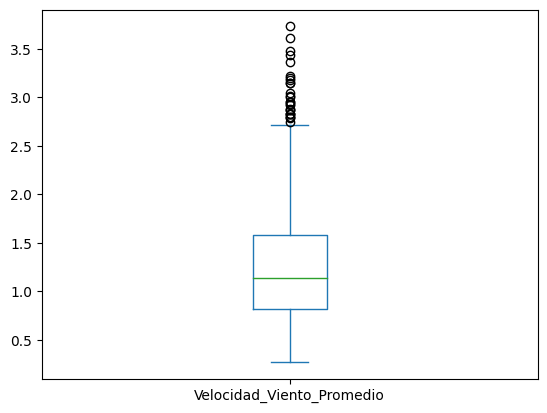

In [ ]:
Dataset_Fallas_Clima['Velocidad_Viento_Promedio'].plot.box()

De loa graficos se puede concluir que los valores atípicos correspondiente al clima (Temperatura_promedio, Precipitacion_acumulada y Velocidad_viento_promedio) no se imputan porque no son errores en los datos.

## **Limpieza de Nulos**

En revisión realizada se tiene que NO se evidencian valores nulos después de integrar los datasets de Fallas y Clima:

In [ ]:
Dataset_Fallas_Clima.isnull().sum()

Fecha                        0
Zona                         0
Temperatura_Promedio         0
Precipitacion_Acumulada      0
Velocidad_Viento_Promedio    0
Falla                        0
dtype: int64

## **Creación de nuevas variables**

Con la información de la variable 'Duracion_Falla_Horas', creamos nuestra variable objetivo de clasifiación, la cual definió si de acuerdo a la duración requirió intervención humana es decir si fue considerada falla o no, toda vez que el dataset registra duraciones, lo anterior debido a que se registran duraciones de segundos pero el sistema corrigió automaticamente las fallas y no requirió de intervenciones

Para este proceso de definir si hubo falla o no se determina con los experto electrícos que una duración de 5 minutos o mas requiere de intervención humana por ende se clasificará con Falla: SI, lo menor a este tiempo se claficara como No es decir no hubo falla.

En primera instancia eliminamos la variable que ya no se necesita para el caso de estudio -> "Fecha.

Posterior a haber generado la variable objetivo categorica; se proceden a eliminar la variable: "Fecha", toda vez que las misma ya no es necesaria para el analisis y trabajo venidero.

In [ ]:
#Ya realizadas la creacion de esta variable pordemos eliminar las variables 'Fecha'
Dataset_Fallas_Clima.drop('Fecha', axis=1, inplace=True)
Dataset_Fallas_Clima.head()

,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
0,U,15.2,0.0,1.450000,1
1,U,16.2,0.0,1.066667,1
2,U,15.3,0.2,0.583333,1
3,U,17.0,0.0,0.916667,1
4,U,20.3,0.0,0.800000,1


Procedemos a realizar la conversión de la variable independiente "Zona" a través de técnica de Encoder así:

* R (Rural) -> 1
* U (Urbano)-> 0

In [ ]:
#Conversión encoder de la varibale Zona
Dataset_Fallas_Clima['Zona'] = Dataset_Fallas_Clima['Zona'].replace({'R': 1, 'U': 0})
Dataset_Fallas_Clima

,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
0,0,15.2,0.0,1.450000,1
1,0,16.2,0.0,1.066667,1
2,0,15.3,0.2,0.583333,1
3,0,17.0,0.0,0.916667,1
4,0,20.3,0.0,0.800000,1
...,...,...,...,...,...
1517,1,14.3,0.0,0.850000,0
1518,1,13.2,0.0,1.366667,0
1519,1,21.5,0.0,2.016667,0
1520,1,15.2,0.0,0.583333,0


Relizamos un revisión de la estructura del dataset para validar la codificación de la variable Zona anteriormente mencionadas:

In [ ]:
Dataset_Fallas_Clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Zona                       1522 non-null   category
 1   Temperatura_Promedio       1522 non-null   float64 
 2   Precipitacion_Acumulada    1522 non-null   float64 
 3   Velocidad_Viento_Promedio  1522 non-null   float64 
 4   Falla                      1522 non-null   int64   
dtypes: category(1), float64(3), int64(1)
memory usage: 49.3 KB


Actualizamos tipo de dato según naturaleza de la variable -> Número (Int)

In [ ]:
Dataset_Fallas_Clima['Zona'] = Dataset_Fallas_Clima['Zona'].astype('int')
Dataset_Fallas_Clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Zona                       1522 non-null   int64  
 1   Temperatura_Promedio       1522 non-null   float64
 2   Precipitacion_Acumulada    1522 non-null   float64
 3   Velocidad_Viento_Promedio  1522 non-null   float64
 4   Falla                      1522 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 59.6 KB


Finalmente; nuestro dataset: "Dataset_Fallas_Clima" siendo nuestro dataset definiitvo; lo guardamos con nombre: "df_proyecto":

In [ ]:
df_proyecto = Dataset_Fallas_Clima

## **Análisis Exploratorio**

A continuación se realiza un análisis exploratorio de los datos a través de la herramienta Pandas Profiling mediante la cual se genera un informe descriptivo del dataset proporcionando una visión general detallada de los datos:

In [ ]:
ProfileReport(df_proyecto)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## **Análisis de Correlaciones**

En el siguiente apartado procedemos a realizar el análisis de correlación con el objetivo de examinar las relaciónes o asociaciónes entre las variables del dataset.

In [ ]:
matriz_corr = df_proyecto.corr()
matriz_corr

,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
Zona,1.000000,-0.070907,-0.087528,-0.035511,-0.267029
Temperatura_Promedio,-0.070907,1.000000,-0.029748,0.576684,0.220456
Precipitacion_Acumulada,-0.087528,-0.029748,1.000000,0.071559,0.072725
Velocidad_Viento_Promedio,-0.035511,0.576684,0.071559,1.000000,0.154377
Falla,-0.267029,0.220456,0.072725,0.154377,1.000000


A continuación realizamos un mapa de calor con el objetivo de observar mejor las coorelaciones entre las vairables del dataset:

* Variables Independientes:
 - Temperatura_promedio
 - Precipitacion_acumulada
 - Velocidad_viento_promedio
 - Falla
 - Zona

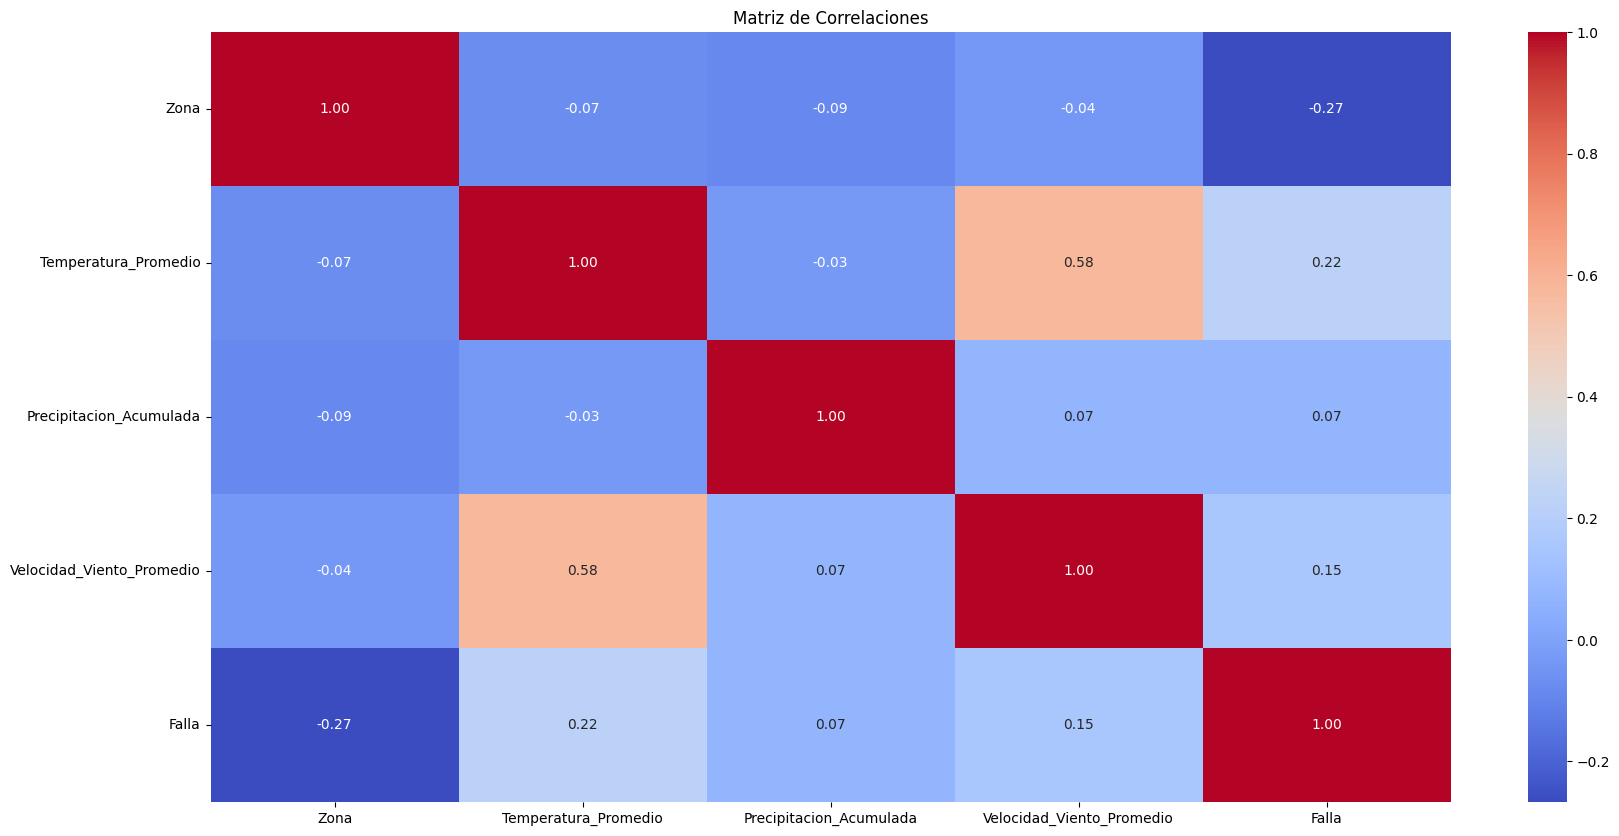

In [ ]:
#Grafico de matriz de correlaciones
plt.figure(figsize=(20,10))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlaciones')
plt.show()

Conclusiones Correlación entre **variables independientes**:

- Se observa una correalción (directa / +) considerable de 0.58 entre "Velocidad_Viento_Promedio" y "Temperatura_promedio".


In [ ]:
matriz_corr['Falla_vs_variables'] = matriz_corr['Falla']
matriz_corr[['Falla_vs_variables']].sort_values(by= 'Falla_vs_variables', ascending = False).style.background_gradient(cmap='coolwarm')

,Falla_vs_variables
Falla,1.000000
Temperatura_Promedio,0.220456
Velocidad_Viento_Promedio,0.154377
Precipitacion_Acumulada,0.072725
Zona,-0.267029


Conclusiones Correlación entre **variables Independientes** y la **Variable Dependiente**:

- Se observa una correlación (directa / +) considerable de: 0.22 entre la variable independiente "Temperatura_Promedio" y la variable dependiente: "Falla".
- Se observa una correlación (directa / +) de: 0.15 entre la variable independiente "Velocidad_Viento_Promedio" y la variable dependiente: "Falla".
- Se observa una correalción considerable (inverda / -) de -0.27 entre la variable independiente "Zona" y la variable dependiente: "Falla".

In [ ]:
df_proyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Zona                       1522 non-null   int64  
 1   Temperatura_Promedio       1522 non-null   float64
 2   Precipitacion_Acumulada    1522 non-null   float64
 3   Velocidad_Viento_Promedio  1522 non-null   float64
 4   Falla                      1522 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 59.6 KB


## **Transformación de los datos**

A continuación procedemos a realizar estandarización haciendo uso de la librería de StandardScaler de Python para las variables climatologicas: **Temperatura_promedio**, **Precipitacion_acumulada**, y **Velocidad_viento_promedio**.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializa el escalador estándar
scaler = StandardScaler()

# Selecciona solo las columnas numéricas
columnas_numericas = ['Temperatura_Promedio', 'Precipitacion_Acumulada', 'Velocidad_Viento_Promedio']

# Normaliza las columnas numéricas
df_proyecto[columnas_numericas] = scaler.fit_transform(df_proyecto[columnas_numericas])

Observamos el dataset en su versión final balanceado y tranformado (Estandarizado):

In [ ]:
df_proyecto

,Zona,Temperatura_Promedio,Precipitacion_Acumulada,Velocidad_Viento_Promedio,Falla
0,0,-0.776399,-0.145010,0.361487,1
1,0,-0.452180,-0.145010,-0.320269,1
2,0,-0.743977,-0.070673,-1.179873,1
3,0,-0.192806,-0.145010,-0.587043,1
4,0,0.877115,-0.145010,-0.794533,1
...,...,...,...,...,...
1517,1,-1.068195,-0.145010,-0.705609,0
1518,1,-1.424835,-0.145010,0.213279,0
1519,1,1.266177,-0.145010,1.369299,0
1520,1,-0.776399,-0.145010,-1.179873,0


Finalmente procedemos a almacenar el dataser tratado en los apartados anteriores, dataset próximo a ser fuente e insumo para análisis de los modelos predictivos

In [ ]:
# Guardamos archivo CSV
from google.colab import files

df_proyecto.to_csv('Dataset_Proyecto.csv', index=False)